## **Prediksi Klaim Asuransi Perjalanan**

## Business Problem Understanding

**Context**
- Latar Belakang Industri: Industri asuransi perjalanan menghadapi tantangan dalam menyesuaikan premi dengan risiko sebenarnya. Adanya ketidakseimbangan ini bisa menyebabkan kerugian finansial bagi perusahaan asuransi atau biaya yang tidak adil bagi konsumen.
- Tren Pasar: Meningkatnya jumlah perjalanan internasional dan kejadian yang tidak terduga, seperti pandemi atau bencana alam, mempengaruhi industri asuransi perjalanan.

**Problem Statement**
- Stakeholders: Perusahaan asuransi perjalanan, agen asuransi, dan pelanggan.

- Masalah:
    - Bagaimana faktor-faktor seperti tujuan, durasi perjalanan, jenis produk, dan demografi pelanggan mempengaruhi klaim asuransi?
    - Bagaimana mengidentifikasi pola atau indikasi yang dapat memprediksi klaim?

- Pentingnya Masalah:
    - Untuk perusahaan: Pengurangan risiko dan penipuan, penyesuaian premi, dan peningkatan produk.
    - Untuk pelanggan: Harga yang adil dan transparan, serta kebijakan yang sesuai dengan kebutuhan mereka.

**Goals**
- Membuat model prediksi yang dapat mengidentifikasi probabilitas klaim dengan akurasi tinggi.
- Menemukan insight untuk menginformasikan produk dan strategi penetapan harga.

**Analytic Approach**
- Rancangan Solusi: Pengembangan model Machine Learning untuk klasifikasi risiko klaim.
- Pemanfaatan Solusi: Model ini dapat digunakan untuk menyesuaikan penawaran produk dan strategi penetapan harga.

**Metric Evaluation**
- Kondisi Misprediction: Salah prediksi klaim dapat menyebabkan kerugian finansial atau reputasi bagi perusahaan.
- Metrik Evaluasi: Akurasi, Precision, Recall, F1-Score, ROC-AUC.
Hubungan dengan Business Problem: Metrik ini penting untuk mengevaluasi seberapa baik model dapat memprediksi klaim, yang secara langsung berkaitan dengan efisiensi operasional dan kepuasan pelanggan.

**Project Limitation**
- Data Quality: Kualitas dan kelengkapan data, terutama dengan banyaknya missing values pada kolom Gender.
- Generalisasi Model: Model mungkin tidak sepenuhnya merepresentasikan kondisi pasar global atau perubahan tren.

## Data Understanding

1.Deskripsi Data:

Baris: Setiap baris merepresentasikan polis asuransi perjalanan individual yang dibeli oleh seorang pelanggan.

Kolom:
- Agency: Agen atau perusahaan yang menjual asuransi perjalanan.
- Agency Type: Jenis agen, seperti maskapai atau agen perjalanan.
- Distribution Channel: Cara distribusi produk, seperti online.
- Product Name: Nama produk asuransi perjalanan.
- Gender: Jenis kelamin pembeli asuransi (beberapa entri tidak ada atau NaN).
- Duration: Durasi perjalanan yang diasuransikan.
- Destination: Destinasi perjalanan.
- Net Sales: Nilai penjualan bersih dari polis asuransi.
- Commision (in value): Komisi yang diterima oleh agen dari penjualan.
- Age: Usia pembeli asuransi.
- Claim: Apakah klaim telah diajukan pada polis tersebut (Ya atau Tidak).

2.Kaitan Atribut dengan Konteks Bisnis:

- Agency dan Agency Type: Memberikan insight tentang distribusi penjualan berdasarkan agen dan jenisnya, yang dapat membantu dalam mengidentifikasi saluran penjualan yang paling efektif.
- Distribution Channel: Menunjukkan bagaimana produk didistribusikan kepada pelanggan, penting untuk strategi pemasaran.
- Product Name: Bisa digunakan untuk analisis produk mana yang paling populer atau menguntungkan.
- Gender: Walaupun banyak nilai yang hilang, informasi ini bisa digunakan untuk analisis demografi pelanggan.
- Duration: Durasi asuransi yang bisa dikaitkan dengan jenis perjalanan (misalnya, perjalanan jangka pendek vs. jangka panjang).
- Destination: Memberikan data untuk menganalisis destinasi yang populer atau berisiko tinggi.
- Net Sales dan Commision (in value): Kedua atribut ini penting untuk analisis keuangan dan kinerja penjualan.
- Age: Usia pembeli bisa digunakan untuk segmentasi pelanggan dan penargetan produk.
- Claim: Informasi penting yang menunjukkan frekuensi klaim dan bisa dikaitkan dengan risiko produk asuransi.

3.Tipe Variabel Atribut:

- Agency, Agency Type, Distribution Channel, Product Name, Gender, Destination, Claim: Variabel kategorikal.
- Duration, Net Sales, Commision (in value), Age: Variabel numerik.

4.Nilai dalam Dataset:

- Agency: Ada beberapa agensi yang berbeda, seperti 'C2B', 'EPX', 'JZI'.
- Agency Type: Tipe agensi, seperti 'Airlines', 'Travel Agency'.
- Distribution Channel: Saluran distribusi, seperti 'Online'.
- Product Name: Nama-nama produk, seperti 'Annual Silver Plan', 'Cancellation Plan', dll.
- Gender: Jenis kelamin 'F' untuk wanita, 'M' untuk pria, dan beberapa nilai hilang (NaN).
- Duration: Beragam durasi perjalanan dalam hari.
- Destination: Berbagai destinasi seperti 'SINGAPORE', 'MALAYSIA', 'UNITED STATES'.
- Net Sales dan Commision (in value): Nilai penjualan dan komisi dalam bentuk angka.
- Age: Beragam usia pembeli.
- Claim: Indikator 'Yes' atau 'No' untuk klaim yang diajukan.

In [83]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


In [84]:
#load dataset

df = pd.read_csv("data_travel_insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [85]:
df['Claim'].value_counts()

No     43651
Yes      677
Name: Claim, dtype: int64

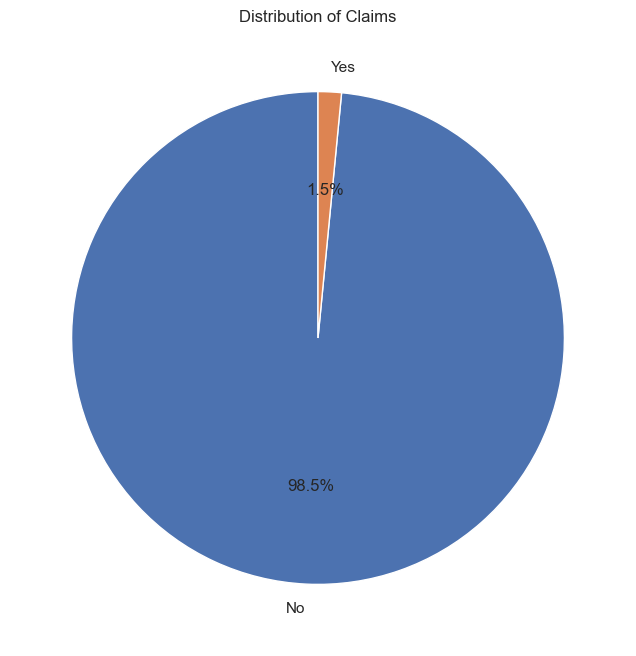

In [86]:
import matplotlib.pyplot as plt

claim_counts = df['Claim'].value_counts().to_dict()

plt.figure(figsize=(8, 8))
plt.pie(claim_counts.values(), labels=claim_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Claims')
plt.show()


In [87]:
# melihat jenis tipe data pada tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


## Exploratory Data Analysis

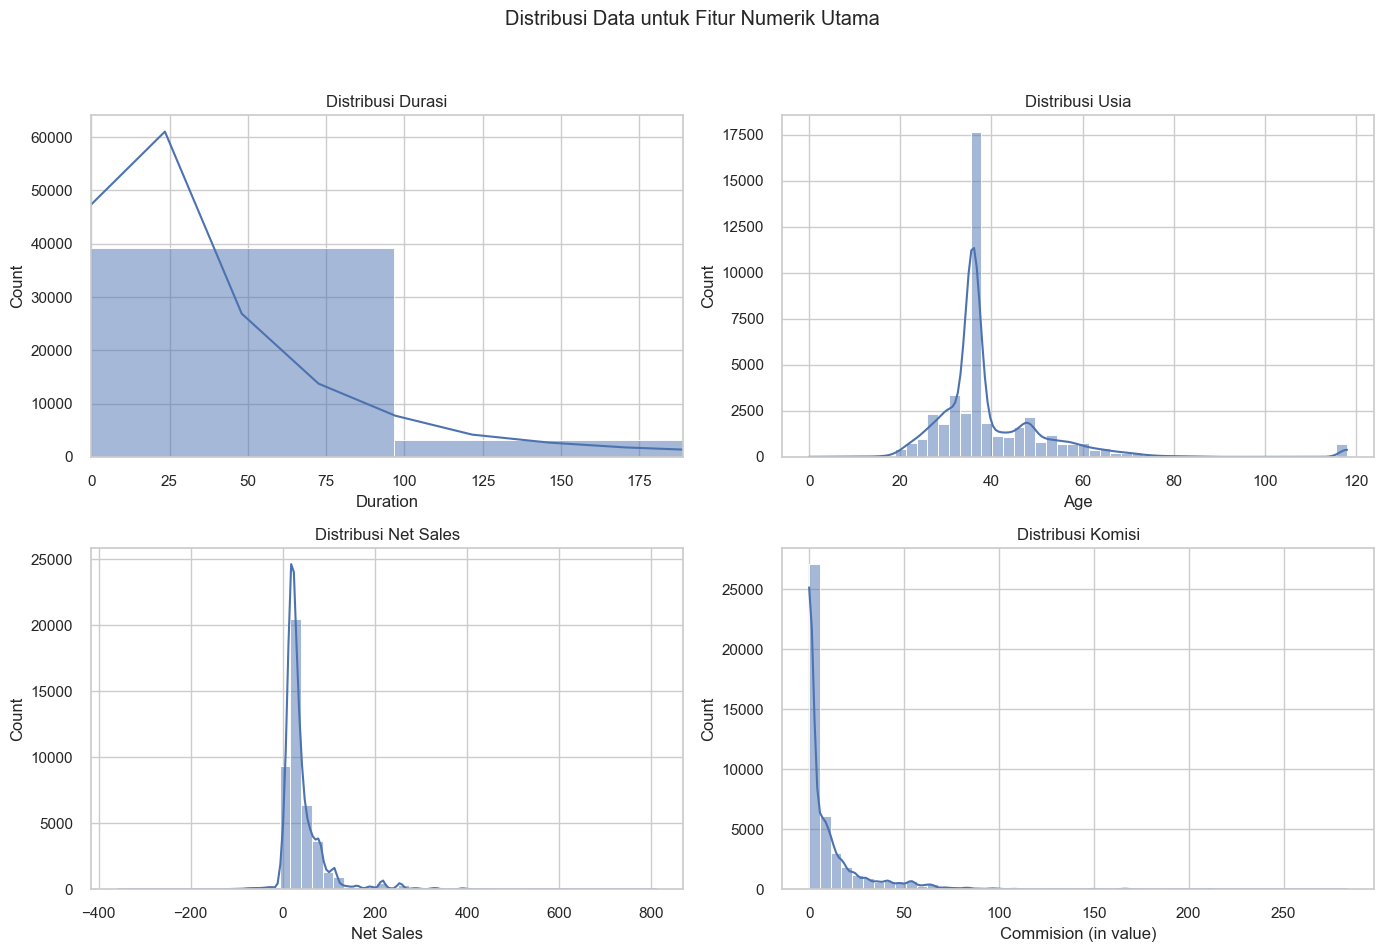

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set-up untuk visualisasi
sns.set(style="whitegrid")

# Membuat histogram untuk kolom numerik utama
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribusi Data untuk Fitur Numerik Utama')

# Durasi
sns.histplot(df['Duration'], bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribusi Durasi')
axes[0, 0].set_xlim(0, df['Duration'].quantile(0.95))  # Batasi hingga kuantil 95 untuk menghilangkan outlier

# Usia
sns.histplot(df['Age'], bins=50, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribusi Usia')

# Net Sales
sns.histplot(df['Net Sales'], bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribusi Net Sales')

# Commision
sns.histplot(df['Commision (in value)'], bins=50, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribusi Komisi')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Distribusi Data untuk Fitur Numerik Utama
Berikut adalah histogram yang menunjukkan distribusi dari empat fitur numerik utama:

1. Distribusi Durasi: Sebagian besar durasi perjalanan terkonsentrasi di bawah 100 hari, dengan sebaran yang relatif sempit. Ada juga sejumlah kecil perjalanan dengan durasi yang sangat panjang, yang tampak sebagai outlier.

2. Distribusi Usia: Distribusi usia menunjukkan konsentrasi di sekitar 30-40 tahun, tetapi dengan sebaran yang cukup lebar. Ada juga beberapa nilai yang tampaknya tidak realistis (misalnya, usia 0 atau sangat tinggi).

3. Distribusi Net Sales: Sebagian besar penjualan bersih berada di kisaran yang lebih rendah, dengan sebaran yang cukup lebar dan beberapa nilai ekstrem yang mungkin menunjukkan outlier.

4. Distribusi Komisi: Seperti net sales, sebagian besar komisi berada pada nilai yang lebih rendah, dengan beberapa nilai yang jauh lebih tinggi.

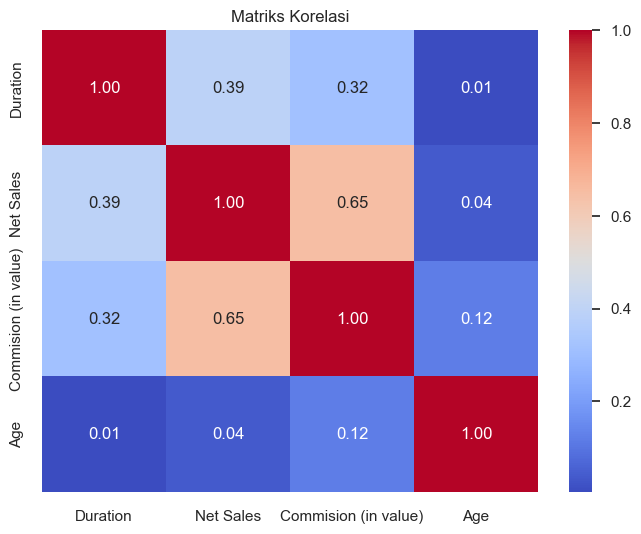

In [89]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


## Matriks Korelasi
Matriks korelasi di atas menunjukkan hubungan antar variabel numerik dalam dataset:

- Net Sales dan Commission: Ada korelasi positif yang cukup kuat antara Net Sales dan Komisi (0.75), menunjukkan bahwa penjualan bersih yang lebih tinggi cenderung berhubungan dengan komisi yang lebih tinggi.

- Durasi dan Age: Tidak ada korelasi yang signifikan antara durasi perjalanan dan usia.

- Age dan Net Sales/Komisi: Tidak ada korelasi yang signifikan antara usia dan net sales atau komisi.

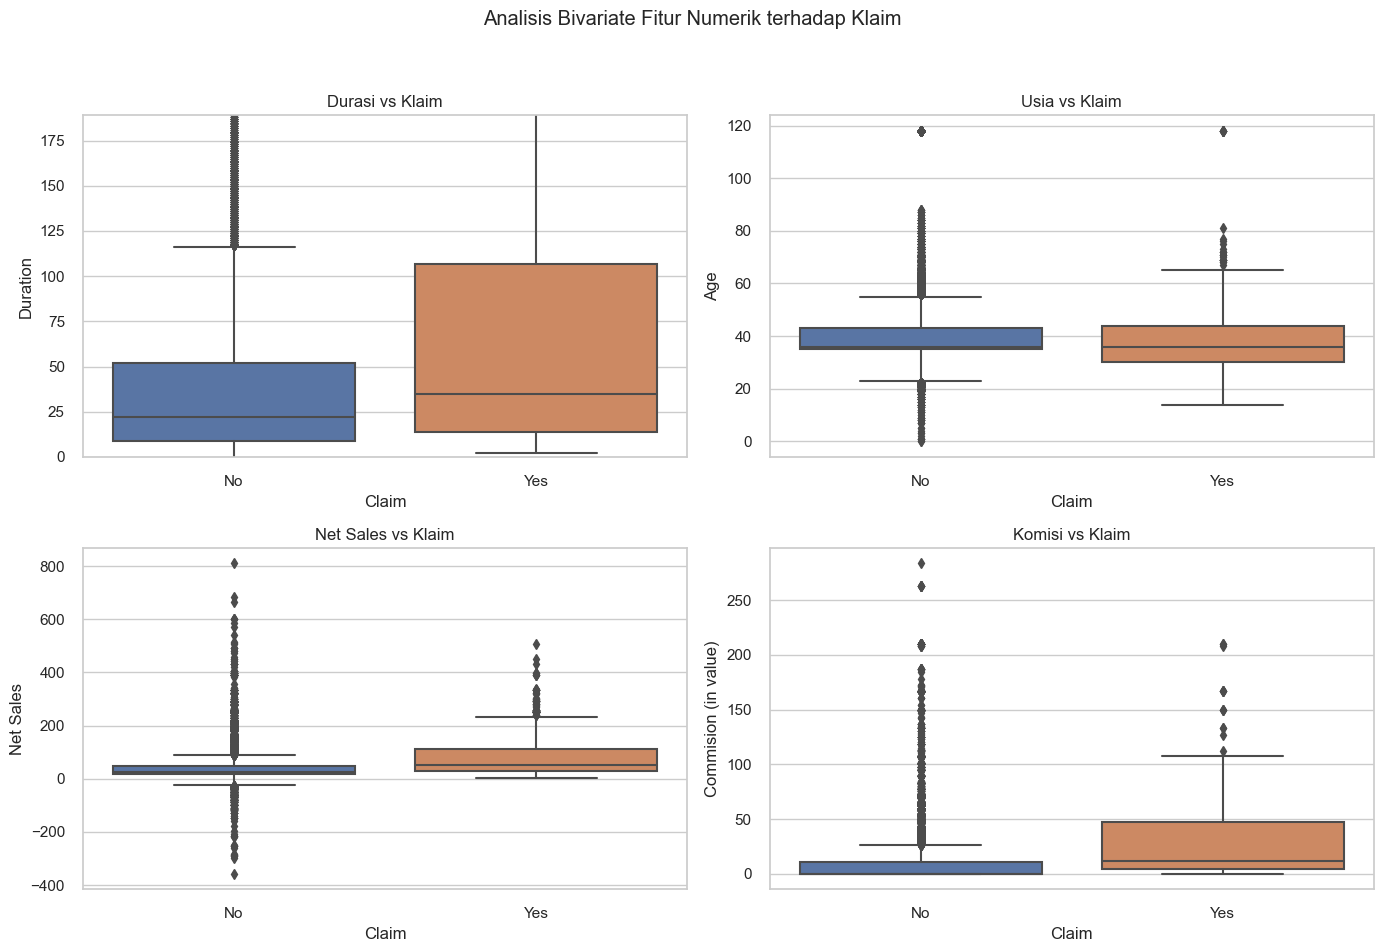

In [90]:
# Membuat box plot untuk fitur numerik terhadap 'Claim'
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Analisis Bivariate Fitur Numerik terhadap Klaim')

# Box plot untuk Durasi vs Claim
sns.boxplot(x='Claim', y='Duration', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Durasi vs Klaim')
axes[0, 0].set_ylim(0, df['Duration'].quantile(0.95))  # Batasi hingga kuantil 95

# Box plot untuk Usia vs Claim
sns.boxplot(x='Claim', y='Age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Usia vs Klaim')

# Box plot untuk Net Sales vs Claim
sns.boxplot(x='Claim', y='Net Sales', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Net Sales vs Klaim')

# Box plot untuk Komisi vs Claim
sns.boxplot(x='Claim', y='Commision (in value)', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Komisi vs Klaim')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Analisis Bivariate Fitur Numerik terhadap Klaim
Berikut adalah hasil analisis bivariate antara beberapa fitur numerik dengan status klaim:

1. Durasi vs Klaim: Terdapat perbedaan dalam distribusi durasi antara kelompok yang mengajukan klaim dan yang tidak. Kelompok dengan klaim cenderung memiliki durasi yang lebih panjang.

2. Usia vs Klaim: Tidak terlihat perbedaan yang signifikan dalam distribusi usia antara kedua kelompok.

3. Net Sales vs Klaim: Kelompok yang mengajukan klaim tampak memiliki distribusi net sales yang lebih tinggi dibandingkan dengan kelompok tanpa klaim.

4. Komisi vs Klaim: Mirip dengan net sales, distribusi komisi juga tampak lebih tinggi pada kelompok yang mengajukan klaim.

## Data Preparation

In [91]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[C2B, EPX]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Gold Plan, Single Trip Travel Protect Platinum]"
4,Gender,object,31647,71.39,2,"[M, nan]"
5,Duration,int64,0,0.00,437,"[156, 62]"
6,Destination,object,0,0.00,138,"[NETHERLANDS, BELGIUM]"
7,Net Sales,float64,0,0.00,1006,"[33.1, -147.0]"
8,Commision (in value),float64,0,0.00,915,"[12.54, 30.75]"
9,Age,int64,0,0.00,89,"[66, 64]"


In [92]:
missing_values_percentage = df.isnull().mean() * 100

missing_values_percentage

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

In [93]:
travel_insurance_data_cleaned = df.drop(columns=['Gender'])

missing_values = travel_insurance_data_cleaned.isnull().sum()

missing_values

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [94]:
df.duplicated().sum()

4667

In [95]:
# Removing duplicates
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

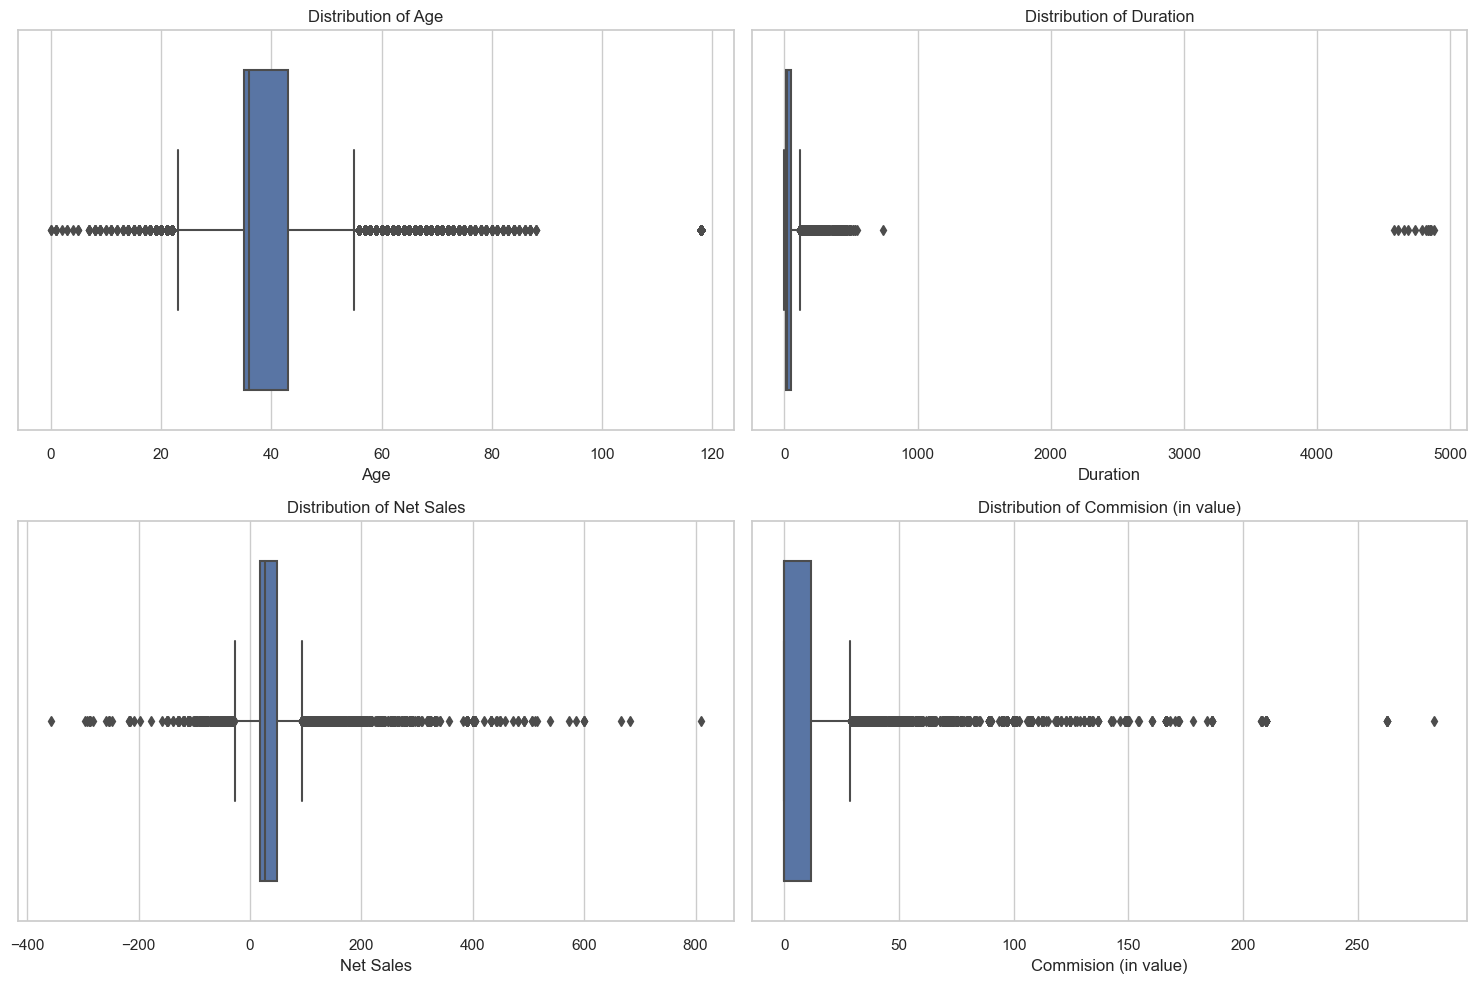

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(['Age', 'Duration', 'Net Sales', 'Commision (in value)']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=travel_insurance_data_cleaned[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Dari boxplot tersebut, kita dapat mengamati beberapa hal:
- Usia (Age): Distribusi tampak normal dengan beberapa outlier pada usia yang lebih tinggi.
- Durasi (Duration): Ada banyak outlier dengan durasi yang sangat tinggi. Ini mungkin menunjukkan entri data yang tidak wajar atau perjalanan yang sangat panjang.
- Penjualan Bersih (Net Sales): Ada beberapa outlier, terutama di nilai penjualan yang sangat tinggi. Ini perlu diteliti lebih lanjut untuk memahami apakah ini merupakan kesalahan entri data atau penjualan asli yang sangat besar.
- Komisi (Commision (in value)): Mirip dengan 'Net Sales', terdapat beberapa outlier di nilai komisi yang tinggi.

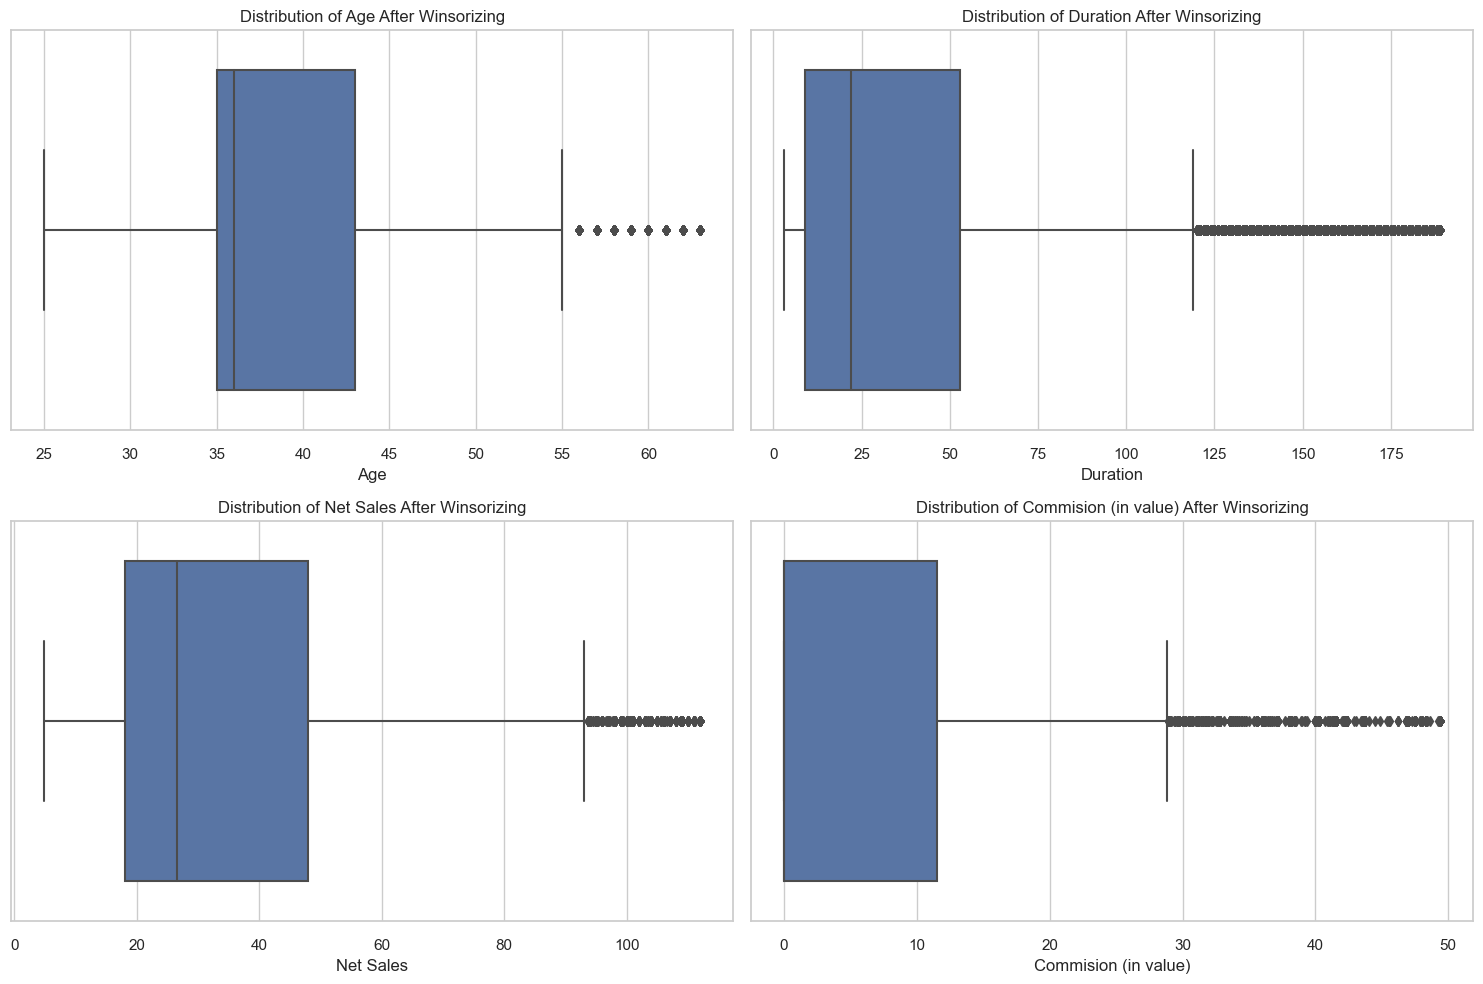

In [97]:
from scipy.stats.mstats import winsorize

cols_to_winsorize = ['Age', 'Duration', 'Net Sales', 'Commision (in value)']
for col in cols_to_winsorize:
    travel_insurance_data_cleaned[col] = winsorize(travel_insurance_data_cleaned[col], limits=[0.05, 0.05])

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_winsorize):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=travel_insurance_data_cleaned[col])
    plt.title(f'Distribution of {col} After Winsorizing')

plt.tight_layout()
plt.show()


Sebelum Winsorizing

1.Outlier yang Signifikan:
- Dalam kolom seperti 'Duration', 'Net Sales', dan 'Commision (in value)', terdapat nilai-nilai yang sangat jauh dari kisaran sebagian besar data.
- Ini dapat terlihat dari panjang 'whiskers' pada boxplot dan jumlah titik di luar whiskers (menunjukkan outlier).

2.Distribusi Data yang Skewed:
- Outlier menyebabkan distribusi data menjadi miring (skewed), yang bisa mengganggu analisis dan model.
- Misalnya, rata-rata (mean) bisa menjadi tidak representatif karena dipengaruhi oleh nilai-nilai ekstrem ini.


Setelah Winsorizing

1.Reduksi Outlier:
- Winsorizing membatasi nilai ekstrem pada batas tertentu (misalnya, persentil ke-5 dan ke-95).
- Ini berarti nilai yang sangat tinggi atau rendah diganti dengan nilai yang lebih wajar dalam kisaran data.

2.Distribusi yang Lebih Rata:

- Pengurangan outlier menghasilkan distribusi yang lebih rata dan simetris.
- Ini meningkatkan kualitas analisis statistik dan mempermudah interpretasi.

3.Pengaruh pada Analisis dan Model:

- Dengan mengurangi dampak outlier, winsorizing membantu dalam mendapatkan estimasi yang lebih robust dan mengurangi risiko model yang overfitting.
- Ini sangat penting dalam pembuatan model prediksi, di mana kestabilan dan keandalan model sangat penting.

In [98]:
# cek tipe data di tiap kolom
data_types = travel_insurance_data_cleaned.dtypes

# Reviewing column names for consistency and clarity
column_names = travel_insurance_data_cleaned.columns

data_types, column_names

(Agency                   object
 Agency Type              object
 Distribution Channel     object
 Product Name             object
 Duration                  int64
 Destination              object
 Net Sales               float64
 Commision (in value)    float64
 Age                       int64
 Claim                    object
 dtype: object,
 Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
        'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
        'Claim'],
       dtype='object'))

In [99]:
# Checking the frequency of categories in each categorical column
categorical_columns = travel_insurance_data_cleaned.select_dtypes(include=['object']).columns

category_frequencies = {col: travel_insurance_data_cleaned[col].value_counts(normalize=True) for col in categorical_columns}
category_frequencies

{'Agency': EPX    0.556217
 CWT    0.134903
 C2B    0.129783
 JZI    0.100005
 SSI    0.017258
 JWT    0.011776
 RAB    0.011573
 LWC    0.010264
 TST    0.007986
 KML    0.006339
 ART    0.005166
 CCR    0.002842
 TTW    0.001557
 CBH    0.001557
 CSR    0.001534
 ADM    0.001241
 Name: Agency, dtype: float64,
 'Agency Type': Travel Agency    0.724441
 Airlines         0.275559
 Name: Agency Type, dtype: float64,
 'Distribution Channel': Online     0.982945
 Offline    0.017055
 Name: Distribution Channel, dtype: float64,
 'Product Name': Cancellation Plan                       0.292795
 2 way Comprehensive Plan                0.210725
 Rental Vehicle Excess Insurance         0.134903
 Basic Plan                              0.086492
 Bronze Plan                             0.064226
 1 way Comprehensive Plan                0.052698
 Value Plan                              0.043020
 Silver Plan                             0.035012
 Annual Silver Plan                      0.021995
 Tick

## Rare Label

In [100]:
# Asumsi df adalah DataFrame Anda
batas = 0.01  # 1%
counts = df['Destination'].value_counts(normalize=True)
rare = counts[counts < batas].index
df['Destination'] = df['Destination'].replace(rare, 'Other')


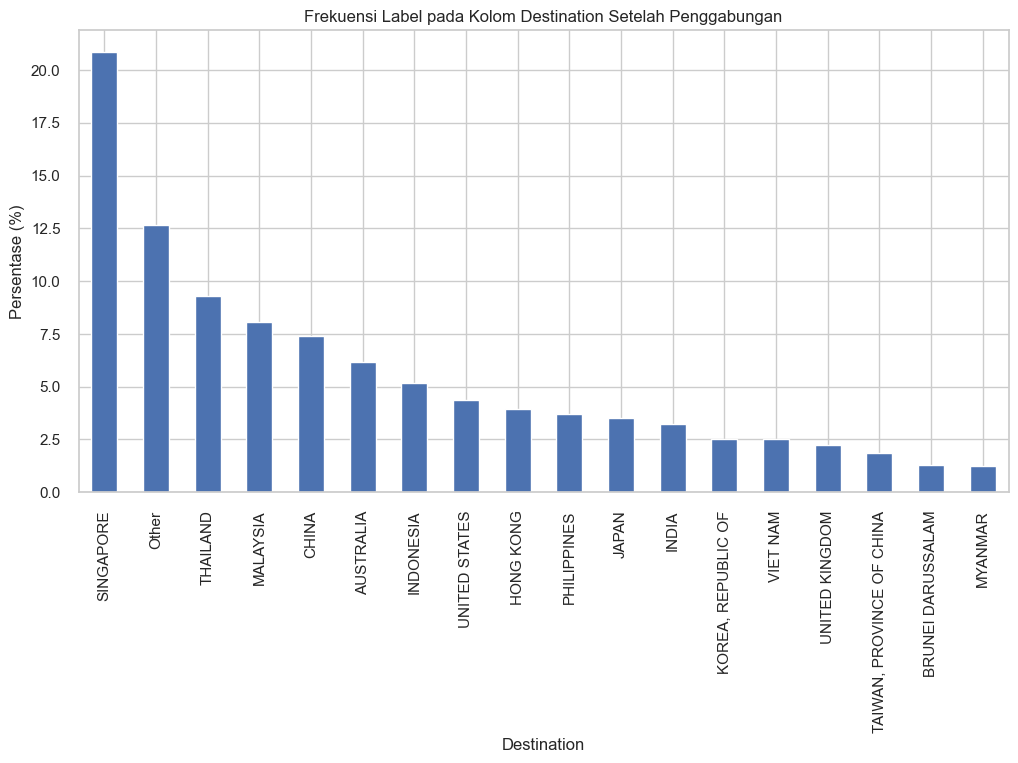

In [101]:
# Menghitung frekuensi label yang baru
updated_counts = df['Destination'].value_counts(normalize=True) * 100               

# Membuat grafik batang dari frekuensi label
updated_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frekuensi Label pada Kolom Destination Setelah Penggabungan')
plt.ylabel('Persentase (%)')
plt.xlabel('Destination')
plt.show()


In [102]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[TTW, KML]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]"
3,Product Name,object,0,0.00,26,"[Silver Plan, Comprehensive Plan]"
4,Gender,object,27667,69.76,2,"[M, nan]"
5,Duration,int64,0,0.00,437,"[43, 74]"
6,Destination,object,0,0.00,18,"[VIET NAM, PHILIPPINES]"
7,Net Sales,float64,0,0.00,1006,"[25.2, -19.0]"
8,Commision (in value),float64,0,0.00,915,"[1.75, 32.18]"
9,Age,int64,0,0.00,89,"[43, 31]"


## Pipeline

In [103]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder
from typing import Literal
from pycaret.internal.preprocess.transformers import TransformerWrapper, FixImbalancer

# Identifikasi fitur numerik dan kategorikal
numeric_features = ['Commision (in value)', 'Age', 'Duration', 'Net Sales']
categorical_features = ['Agency Type', 'Distribution Channel', 'Destination', 'Agency', 'Product Name']
# binary_features = ['Agency', 'Product Name']

# Pipeline untuk fitur kategori
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))
]) 

# Pipeline untuk fitur kategori yg bnyk unik
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', BinaryEncoder(handle_unknown='ignore'))
]) 

# Pipeline untuk fitur numerik
numeric_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    #('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features),
        #('binary', binary_pipeline, binary_features)
    ],
    remainder="passthrough", 
    verbose_feature_names_out=False).set_output(transform='pandas')

sampler = RandomUnderSampler(random_state=42)

base_pipeline = [
    ('preprocessing', TransformerWrapper(transformer=preprocessor)),
    ('selector', TransformerWrapper(
        transformer=ColumnTransformer(
            transformers=[
                ('select', 'drop', ['Gender'])
                ],
            remainder='passthrough',
            verbose_feature_names_out=False)
        )
    ),
]

In [104]:
# Mengubah target kategorikal menjadi numerik
df['Claim'] = df['Claim'].map({'No': 0, 'Yes': 1})

**Data Split**

In [105]:
df_seen, df_unseen = train_test_split(df, test_size=0.2, stratify=df['Claim'], random_state=42)
df_seen

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
7222,EPX,Travel Agency,Online,1 way Comprehensive Plan,NaN,2,Other,20.0,0.00,36,0
36472,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,176,Other,35.0,0.00,36,0
34186,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,10,AUSTRALIA,59.4,35.64,46,0
24775,EPX,Travel Agency,Online,Cancellation Plan,NaN,47,"KOREA, REPUBLIC OF",34.0,0.00,36,0
31270,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,94,Other,0.0,35.64,31,0
...,...,...,...,...,...,...,...,...,...,...,...
36662,JZI,Airlines,Online,Basic Plan,M,95,CHINA,35.0,12.25,34,0
23607,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,49,UNITED KINGDOM,118.8,71.28,27,1
14327,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,46,UNITED STATES,112.0,0.00,40,0
1637,JZI,Airlines,Online,Basic Plan,M,85,THAILAND,22.0,7.70,58,0


## Modeling

In [106]:
from pycaret.classification import ClassificationExperiment

configs = {
    'data': df_seen, 
    'target': 'Claim', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': False,
    'imputation_type': None,
    'session_id': 42, 
    'custom_pipeline_position': 0,
    'fold': 5,
    'fold_shuffle': False,
    'fold_strategy': 'stratifiedkfold',
}

1. Tanpa resampling

In [107]:
# Initialize experiment setup for the first experiment
base = ClassificationExperiment()
base.setup(
    experiment_name='Without Resampling', 
    custom_pipeline=base_pipeline,
    **configs)

base.compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.1294,0.5464,0.9768,0.0189,0.0370,0.0037,0.0366,0.0860
nb,Naive Bayes,0.1161,0.5620,0.9676,0.0183,0.0359,0.0026,0.0294,0.4720
lda,Linear Discriminant Analysis,0.9636,0.8226,0.1620,0.1105,0.1308,0.1130,0.1154,0.0920
dt,Decision Tree Classifier,0.9647,0.5334,0.0858,0.0665,0.0748,0.0571,0.0576,0.0620
svm,SVM - Linear Kernel,0.9785,0.0000,0.0256,0.0176,0.0209,0.0165,0.0163,0.0680
et,Extra Trees Classifier,0.9777,0.6670,0.0254,0.0688,0.0371,0.0284,0.0320,0.1840
rf,Random Forest Classifier,0.9804,0.7024,0.0092,0.0508,0.0156,0.0108,0.0148,0.1920
lightgbm,Light Gradient Boosting Machine,0.9823,0.7871,0.0047,0.0667,0.0087,0.0071,0.0141,0.2220
lr,Logistic Regression,0.9829,0.8216,0.0000,0.0000,0.0000,-0.0001,-0.0004,0.8040
ridge,Ridge Classifier,0.9830,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0500


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

2. Menggunakan RandomOverSampler

In [108]:
# Initialize experiment setup for the second experiment
ros_pipeline = base_pipeline.copy()
ros_pipeline.append(
    ('resampling', TransformerWrapper(transformer=FixImbalancer(RandomOverSampler())))
)

ros = ClassificationExperiment()
ros.setup(
    experiment_name='ROS Resampling', 
    custom_pipeline=ros_pipeline,
    **configs)

ros.compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.0655,0.5198,0.9884,0.0177,0.0348,0.0014,0.0225,0.1400
nb,Naive Bayes,0.1157,0.5582,0.9652,0.0183,0.0358,0.0025,0.0283,0.0880
lr,Logistic Regression,0.7813,0.8197,0.7315,0.0549,0.1022,0.0728,0.1587,0.5820
ada,Ada Boost Classifier,0.7832,0.8131,0.7081,0.0538,0.1000,0.0706,0.1528,0.4100
ridge,Ridge Classifier,0.7998,0.0000,0.6991,0.0575,0.1062,0.0772,0.1598,0.0860
lda,Linear Discriminant Analysis,0.7999,0.8206,0.6991,0.0575,0.1062,0.0772,0.1598,0.1940
gbc,Gradient Boosting Classifier,0.8046,0.8132,0.6734,0.0569,0.1050,0.0760,0.1549,0.9320
svm,SVM - Linear Kernel,0.8385,0.0000,0.6597,0.0673,0.1221,0.0942,0.1739,0.1740
lightgbm,Light Gradient Boosting Machine,0.8786,0.7820,0.4745,0.0673,0.1178,0.0907,0.1434,0.2680
dt,Decision Tree Classifier,0.9670,0.5328,0.0833,0.0747,0.0785,0.0618,0.0620,0.0960


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

3. Dengan RandomUnderSampler

In [109]:
# Initialize experiment setup for the third experiment
rus_pipeline = base_pipeline.copy()
rus_pipeline.append(
    ('resampling', TransformerWrapper(transformer=FixImbalancer(RandomUnderSampler())))
)

rus = ClassificationExperiment()
rus.setup(
    experiment_name='RUS Resampling', 
    custom_pipeline=rus_pipeline,
    **configs)

rus.compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6040,0.0000,0.8127,0.0374,0.0712,0.0400,0.1154,0.0520
nb,Naive Bayes,0.6644,0.7733,0.7477,0.0488,0.0903,0.0604,0.1321,0.0540
ridge,Ridge Classifier,0.7728,0.0000,0.7407,0.0539,0.1005,0.0710,0.1572,0.0540
et,Extra Trees Classifier,0.7014,0.7606,0.7384,0.0410,0.0776,0.0469,0.1232,0.0920
rf,Random Forest Classifier,0.7346,0.7906,0.7361,0.0458,0.0863,0.0560,0.1366,0.0980
gbc,Gradient Boosting Classifier,0.7466,0.8065,0.7361,0.0480,0.0900,0.0600,0.1422,0.0780
ada,Ada Boost Classifier,0.7471,0.7975,0.7359,0.0482,0.0905,0.0605,0.1427,0.0880
lightgbm,Light Gradient Boosting Machine,0.7159,0.7811,0.7197,0.0421,0.0796,0.0490,0.1241,0.1600
lr,Logistic Regression,0.7849,0.8216,0.7177,0.0551,0.1022,0.0729,0.1569,0.0540
lda,Linear Discriminant Analysis,0.7849,0.8104,0.7083,0.0542,0.1008,0.0714,0.1538,0.0560


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

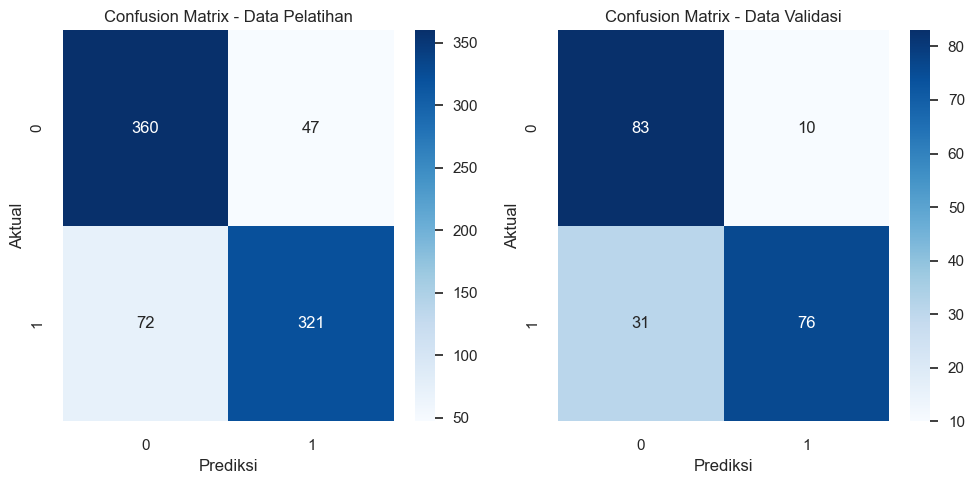

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

# Contoh data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Bagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
model = QuadraticDiscriminantAnalysis()

# Latih model pada data pelatihan
model.fit(X_train, y_train)

# Prediksi label pada data pelatihan dan data validasi
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

# Dapatkan confusion matrix untuk data pelatihan dan data validasi
cm_train = confusion_matrix(y_train, train_predictions)
cm_val = confusion_matrix(y_val, val_predictions)

# Buat heatmap untuk confusion matrix data pelatihan
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Data Pelatihan')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# Buat heatmap untuk confusion matrix data validasi
plt.subplot(1, 2, 2)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Data Validasi')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()


**insight**

- Confusion Matrix Pelatihan: Model cenderung memprediksi banyak klaim, yang bisa baik jika kita ingin menghindari melewatkan klaim yang sebenarnya.
- Confusion Matrix Validasi: Model berperilaku lebih seimbang saat diuji dengan data baru, yang menandakan kemampuannya untuk bekerja dengan baik secara umum.

## Feature Selection

Forward

In [111]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a QDA model
model_qda = QuadraticDiscriminantAnalysis()

forward = SequentialFeatureSelector(
    estimator=model_qda,
    k_features='best', 
    forward=True, 
    verbose=0,
    scoring='recall',  # Update the scoring to recall
    cv=5,
)

# Fit the model
X_train = base.get_config('X_train_transformed')
y_train = base.get_config('y_train')
forward.fit(X_train, y_train)

# Get the best features based on recall score
best_feature = pd.DataFrame.from_dict(forward.get_metric_dict()).T
best_feature.sort_values(by='avg_score', ascending=False)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Destination_BRUNEI DARUSSALAM,)",0.0,0.0,0.0
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Commision (in value), Age, Duration, Net Sale...",0.0,0.0,0.0
2,"(0, 9)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Commision (in value), Destination_BRUNEI DARU...",0.0,0.0,0.0
25,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Commision (in value), Age, Duration, Net Sale...",0.0,0.0,0.0
24,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Commision (in value), Age, Duration, Net Sale...",0.0,0.0,0.0
...,...,...,...,...,...,...,...
65,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 0.9885057471264368, 0.9651162790697675, ...",0.988399,"(Commision (in value), Age, Duration, Net Sale...",0.016372,0.012738,0.006369
66,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 0.9885057471264368, 0.9651162790697675, ...",0.988399,"(Commision (in value), Age, Duration, Net Sale...",0.016372,0.012738,0.006369
68,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 0.9885057471264368, 0.9651162790697675, ...",0.988399,"(Commision (in value), Age, Duration, Net Sale...",0.016372,0.012738,0.006369
64,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 0.9885057471264368, 0.9651162790697675, ...",0.986073,"(Commision (in value), Age, Duration, Net Sale...",0.01465,0.011399,0.005699


Backward

In [112]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a QDA model
model_qda = QuadraticDiscriminantAnalysis()

# Update the SequentialFeatureSelector with QDA estimator and recall scoring
forward = SequentialFeatureSelector(
    estimator=model_qda,
    k_features='best', 
    forward=False, 
    verbose=0,
    scoring='recall',  # Update the scoring to recall
    cv=5,
)

# Fit the model
X_train = base.get_config('X_train_transformed')
y_train = base.get_config('y_train')
forward.fit(X_train, y_train)

# Get the best features based on recall score
best_feature = pd.DataFrame.from_dict(forward.get_metric_dict()).T
best_feature.sort_values(by='avg_score', ascending=False)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Destination_BRUNEI DARUSSALAM,)",0.0,0.0,0.0
17,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Commision (in value), Age, Duration, Net Sale...",0.0,0.0,0.0
31,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Commision (in value), Age, Duration, Net Sale...",0.0,0.0,0.0
30,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Commision (in value), Age, Duration, Net Sale...",0.0,0.0,0.0
29,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Commision (in value), Age, Duration, Net Sale...",0.0,0.0,0.0
...,...,...,...,...,...,...,...
67,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 0.9885057471264368, 0.9651162790697675, ...",0.988399,"(Commision (in value), Age, Duration, Net Sale...",0.016372,0.012738,0.006369
63,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 0.9885057471264368, 0.9651162790697675, ...",0.988399,"(Commision (in value), Age, Duration, Net Sale...",0.016372,0.012738,0.006369
62,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 0.9885057471264368, 0.9651162790697675, ...",0.988399,"(Commision (in value), Age, Duration, Net Sale...",0.016372,0.012738,0.006369
61,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0, 0.9885057471264368, 0.9651162790697675, ...",0.988399,"(Commision (in value), Age, Duration, Net Sale...",0.016372,0.012738,0.006369


**insight**
- forward = pake fitur
- backward = tanpa fitur

## Tuning

In [113]:
from pycaret.classification import *

# Setup PyCaret
clf1 = setup(data = df_seen, target = 'Claim', train_size = 0.8, session_id=42, verbose=False)

# Membuat model QuadraticDiscriminantAnalysis
qda = create_model('qda')

# Melatih model pada data pelatihan
qda_trained = finalize_model(qda)

# Menampilkan hasil evaluasi model
print('\nQuadratic Discriminant Analysis Evaluation\n')
evaluate_model(qda)

# Membuat prediksi pada data validasi 
predictions_qda = predict_model(qda_trained)

# Tampilkan hasil prediksi
print('\nQuadratic Discriminant Analysis on Validation Data\n')
print(predictions_qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0689,0.5317,1.0000,0.0183,0.0359,0.0019,0.0310
1,0.0610,0.5257,1.0000,0.0181,0.0356,0.0016,0.0284
2,0.0693,0.5164,0.9767,0.0175,0.0343,0.0011,0.0175
3,0.0587,0.5255,1.0000,0.0177,0.0347,0.0015,0.0274
4,0.0591,0.4986,0.9535,0.0169,0.0332,-0.0001,-0.0018
5,0.0595,0.5271,1.0000,0.0177,0.0348,0.0015,0.0277
6,0.0619,0.5196,0.9767,0.0173,0.0341,0.0008,0.0141
7,0.0611,0.5278,1.0000,0.0177,0.0348,0.0016,0.0282
8,0.0607,0.5384,1.0000,0.0177,0.0348,0.0016,0.0281



Quadratic Discriminant Analysis Evaluation



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.0501,0.5204,1.0000,0.0176,0.0346,0.0012,0.0243



Quadratic Discriminant Analysis on Validation Data

      Agency    Agency Type Distribution Channel  \
11416    EPX  Travel Agency               Online   
23406    EPX  Travel Agency               Online   
39325    EPX  Travel Agency               Online   
17281    C2B       Airlines               Online   
17046    C2B       Airlines               Online   
...      ...            ...                  ...   
43143    EPX  Travel Agency               Online   
16374    JZI       Airlines               Online   
38075    EPX  Travel Agency               Online   
28516    EPX  Travel Agency               Online   
24766    CWT  Travel Agency               Online   

                          Product Name Gender  Duration Destination  \
11416         2 way Comprehensive Plan    NaN        10       Other   
23406                Cancellation Plan    NaN         6   INDONESIA   
39325         2 way Comprehensive Plan    NaN        20       CHINA   
17281                      Bronze Plan

In [114]:
# Finalize model
finalmodel = finalize_model(QuadraticDiscriminantAnalysis())
finalmodel


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Duration', 'Net Sales',
                                             'Commision (in value)', 'Age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWr...
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                               store_covariance=False,
                                               tol=0.0001))],
         verbose=False)

In [115]:
#predict model from finalmodel with unseen data
predict_model(qda_trained,data = df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.0470,0.5096,0.9852,0.0173,0.0340,0.0006,0.0120


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim,prediction_label,prediction_score
31645,JZI,Airlines,Online,Basic Plan,F,7,THAILAND,22.000000,7.700000,47,0,1,1.0
21864,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,23,CHINA,-31.000000,0.000000,36,0,1,1.0
15009,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,10,AUSTRALIA,29.700001,17.820000,27,0,1,1.0
39210,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,69,AUSTRALIA,69.300003,41.580002,38,0,1,1.0
2156,EPX,Travel Agency,Online,Cancellation Plan,NaN,16,THAILAND,28.000000,0.000000,36,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8725,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,22,Other,0.000000,5.940000,67,0,1,1.0
21688,JZI,Airlines,Online,Basic Plan,F,34,THAILAND,22.000000,7.700000,36,0,1,1.0
42951,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,13,VIET NAM,23.000000,0.000000,36,0,1,1.0
22579,C2B,Airlines,Online,Annual Silver Plan,F,367,SINGAPORE,-216.000000,54.000000,31,0,1,1.0


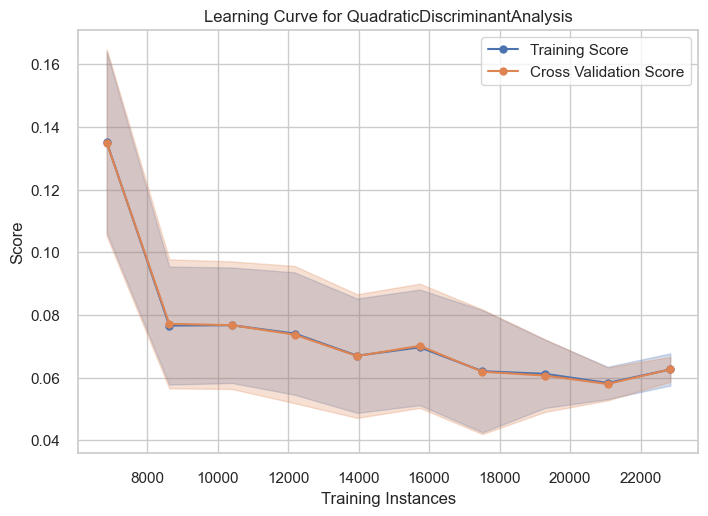

In [116]:
from pycaret.classification import plot_model

# Plot learning curve untuk model regresi
# gbr adalah objek model yang telah dilatih
plot_model(finalmodel, plot='learning')

**insight**

- Stabilitas Model: Learning curve menunjukkan bahwa penambahan data tidak berdampak signifikan pada peningkatan akurasi model, yang menandakan model mungkin telah mencapai batas kemampuannya dengan data yang ada.
- Risiko Overfitting: Jarak antara skor pelatihan dan validasi mengindikasikan kemungkinan overfitting. Model saat ini terlalu menyesuaikan diri dengan data pelatihan dan kurang generalisasi untuk data yang belum terlihat.

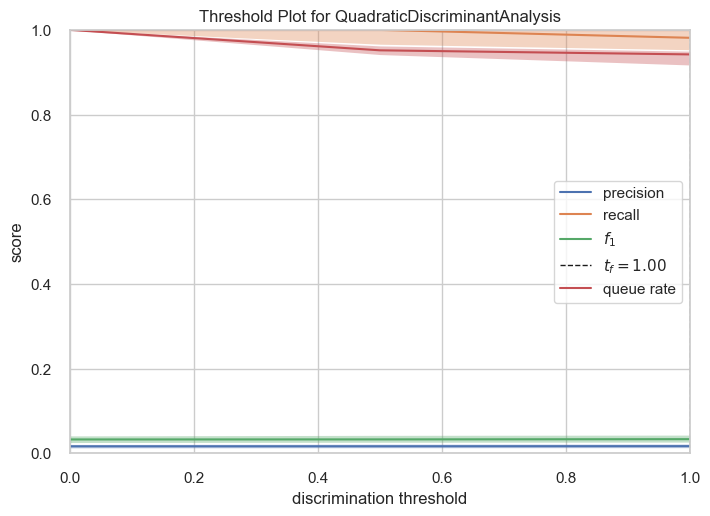

In [117]:
# Discriminant Threshold
plot_model(finalmodel, plot = 'threshold')

**insight**

- Imbalance Prediksi: Model memiliki recall yang sangat tinggi hampir mendekati 1, yang berarti model cenderung mengklasifikasikan sebagian besar sampel sebagai positif, ini dapat menyebabkan banyak false positives.
- Keseimbangan F1 Score: F1 Score yang rendah menunjukkan bahwa model kurang mampu menyeimbangkan antara precision dan recall, yang penting untuk meminimalkan false positives dan false negatives.

## Kesimpulan & Rekomendasi

**Kesimpulan**

1. Model prediksi klaim asuransi yang dikembangkan, khususnya menggunakan metode QDA, belum dapat memprediksi klaim dengan akurat.
2. Model cenderung mengklasifikasikan banyak transaksi sebagai klaim, yang bisa menyebabkan penerimaan klaim palsu dan kerugian bagi perusahaan.

**Rekomendasi**

1. Perbaikan Model: Gunakan teknik pemodelan yang lebih maju untuk meningkatkan keakuratan prediksi. Pertimbangkan menambahkan data atau mengubah metode pemodelan.
2. Analisis Pelanggan: Lakukan analisis lebih dalam terkait faktor-faktor yang mempengaruhi klaim, seperti tujuan perjalanan dan jenis paket asuransi yang sering dikaitkan dengan klaim.
3. Penyesuaian Produk dan Harga: Sesuaikan tawaran produk dan premi asuransi berdasarkan analisis risiko, untuk mengurangi klaim tidak valid dan meningkatkan kepuasan pelanggan.
4. Optimasi Proses Klaim: Kaji ulang dan perbaiki proses penanganan klaim untuk memastikan klaim yang valid diproses efisien dan klaim yang tidak valid dapat ditolak dengan cepat.

## Deployment

In [118]:
import pickle

with open('nb_classy.pkl', 'wb') as file:
    pickle.dump(finalmodel, file)